# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file   = 'train.p'
validation_file = 'valid.p'
testing_file    = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
print (X_train.shape, y_train.shape)
print (X_valid.shape, y_valid.shape)
print (X_test.shape, y_test.shape)

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

(34799, 32, 32, 3) (34799,)
(4410, 32, 32, 3) (4410,)
(12630, 32, 32, 3) (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train[0].shape
n_classes = 43

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


###  Exploratory visualization of the dataset

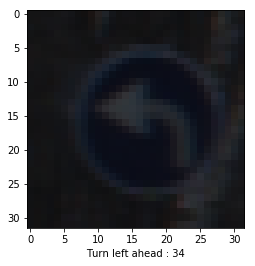

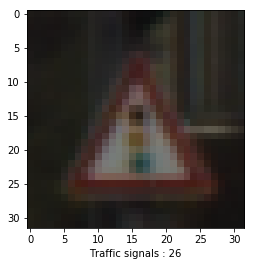

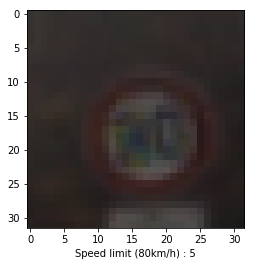

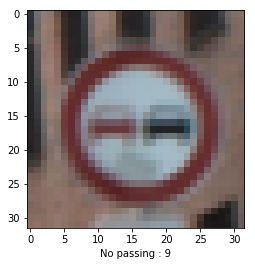

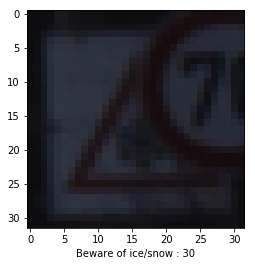

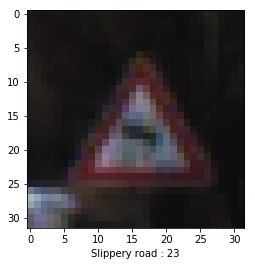

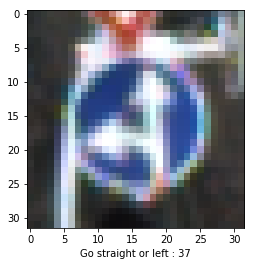

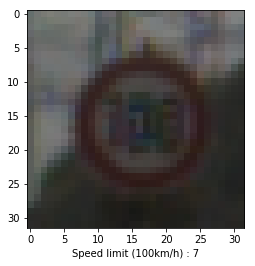

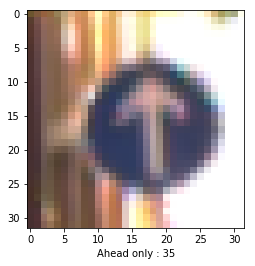

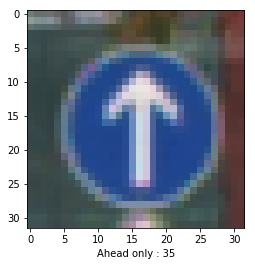

In [4]:
import random
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read the sign names for each id (from signnames.csv) and keep in 
# a dictionary for easy access
signnames_dict = {}

def rgb2gray(x):
    return np.dot(x[...,:3], [0.2989, 0.5870, 0.1140])

with open('signnames.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader, None)
    signnames_dict = {int(k):v for k, v in reader}

for row in range(1,11):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.imshow(image)
    plt.xlabel(signnames_dict[int(y_train[index])] + " : " + str(int(y_train[index])))
    plt.show()

Text(0.5, 0, 'Histogram of test set labels')

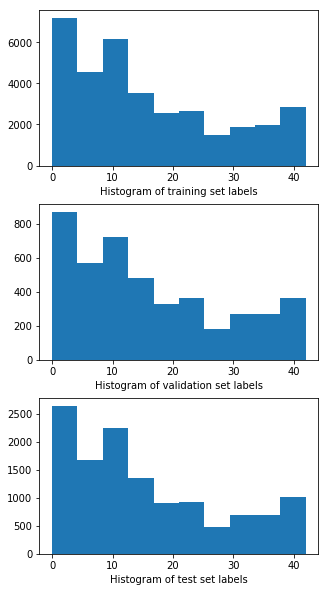

In [5]:
# Histogram of labels in training data
plt.figure(figsize=(5, 10))
plt.subplots_adjust(hspace=0.25)

plt.subplot(3,1,1)
plt.hist(y_train)
plt.xlabel("Histogram of training set labels")

plt.subplot(3,1,2)
plt.hist(y_valid)
plt.xlabel("Histogram of validation set labels")

plt.subplot(3,1,3)
plt.hist(y_test)
plt.xlabel("Histogram of test set labels")

In [6]:
print (signnames_dict[0])
print (signnames_dict[1])
print (signnames_dict[2])
print (signnames_dict[4])

Speed limit (20km/h)
Speed limit (30km/h)
Speed limit (50km/h)
Speed limit (70km/h)


----

## Step 2: Design and Test of Model Architecture


### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
# # Scale data between 0.1 and 0.9
# def scale1(x):
#     return 0.1 + (0.8*x)/255

In [8]:
# def normalize1(x):
#     return (x - 128)/128

In [9]:
# Normalize train, validate and test set
# import tensorflow as tf
# X_train = tf.image.rgb_to_grayscale(X_train)
# X_valid = tf.image.rgb_to_grayscale(X_valid)
# X_test  = tf.image.rgb_to_grayscale(X_test)

In [10]:
# Normalize train, validate and test set
# X_train = normalize1(X_train)
# X_valid = normalize1(X_valid)
# X_test  = normalize1(X_test)

In [11]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
import tensorflow as tf

EPOCHS = 300
BATCH_SIZE = 250

### Model Architecture

In [13]:
# Model tried on 3 channel colored images.

from tensorflow.contrib.layers import flatten

def LeNetDerived_3Channel(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    wc1 = tf.Variable(tf.random_normal([5, 5, 3, 6], mean=mu, stddev=sigma))
    bc1 = tf.Variable(tf.random_normal([6], mean=mu, stddev=sigma))
    x = tf.nn.conv2d(x, wc1, strides=[1, 1, 1, 1], padding='VALID')
    x = tf.nn.bias_add(x, bc1)
    
    # Adding dropout early in CNN
    x = tf.nn.dropout(x, 0.50)
        
    # Activation.
    x = tf.nn.relu(x)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 2: Convolutional. Input = 14x14x6, Output = 10x10x16.
    wc2 = tf.Variable(tf.random_normal([5, 5, 6, 16], mean=mu, stddev=sigma))
    bc2 = tf.Variable(tf.random_normal([16], mean=mu, stddev=sigma))
    x = tf.nn.conv2d(x, wc2, strides=[1, 1, 1, 1], padding='VALID')
    x = tf.nn.bias_add(x, bc2)
    
    # Activation.
    x = tf.nn.relu(x)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Flatten. Input = 5x5x16. Output = 400.
    x = flatten(x)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    wfc1 = tf.Variable(tf.random_normal([400, 120], mean=mu, stddev=sigma))
    bfc1 = tf.Variable(tf.random_normal([120], mean=mu, stddev=sigma))
    x = tf.add(tf.matmul(x, wfc1), bfc1)
    
    # Activation.
    x = tf.nn.relu(x)
    
    # Layer 4: Fully Connected. Input = 120. Output = 80.
    wfc2 = tf.Variable(tf.random_normal([120, 80], mean=mu, stddev=sigma))
    bfc2 = tf.Variable(tf.random_normal([80], mean=mu, stddev=sigma))
    x = tf.add(tf.matmul(x, wfc2), bfc2)
    
    # Activation.
    x = tf.nn.relu(x)

    # Layer 5: Fully Connected. Input = 80. Output = 43.
    wfc3 = tf.Variable(tf.random_normal([80, 43], mean=mu, stddev=sigma))
    bfc3 = tf.Variable(tf.random_normal([43], mean=mu, stddev=sigma))
    logits = tf.add(tf.matmul(x, wfc3), bfc3)
    
    return logits

In [14]:
# Model tried on 1 channel grayscale images.

from tensorflow.contrib.layers import flatten

def LeNetDerived_1Channel(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    wc1 = tf.Variable(tf.random_normal([5, 5, 1, 6], mean=mu, stddev=sigma))
    bc1 = tf.Variable(tf.random_normal([6], mean=mu, stddev=sigma))
    x = tf.nn.conv2d(x, wc1, strides=[1, 1, 1, 1], padding='VALID')
    x = tf.nn.bias_add(x, bc1)
    
    # Adding dropout early in CNN
    x = tf.nn.dropout(x, 0.50)
        
    # Activation.
    x = tf.nn.relu(x)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 2: Convolutional. Input = 14x14x6, Output = 10x10x16.
    wc2 = tf.Variable(tf.random_normal([5, 5, 6, 16], mean=mu, stddev=sigma))
    bc2 = tf.Variable(tf.random_normal([16], mean=mu, stddev=sigma))
    x = tf.nn.conv2d(x, wc2, strides=[1, 1, 1, 1], padding='VALID')
    x = tf.nn.bias_add(x, bc2)
    
    # Activation.
    x = tf.nn.relu(x)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Flatten. Input = 5x5x16. Output = 400.
    x = flatten(x)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    wfc1 = tf.Variable(tf.random_normal([400, 120], mean=mu, stddev=sigma))
    bfc1 = tf.Variable(tf.random_normal([120], mean=mu, stddev=sigma))
    x = tf.add(tf.matmul(x, wfc1), bfc1)
    
    # Activation.
    x = tf.nn.relu(x)
    
    # Layer 4: Fully Connected. Input = 120. Output = 80.
    wfc2 = tf.Variable(tf.random_normal([120, 80], mean=mu, stddev=sigma))
    bfc2 = tf.Variable(tf.random_normal([80], mean=mu, stddev=sigma))
    x = tf.add(tf.matmul(x, wfc2), bfc2)
    
    # Activation.
    x = tf.nn.relu(x)

    # Layer 5: Fully Connected. Input = 80. Output = 43.
    wfc3 = tf.Variable(tf.random_normal([80, 43], mean=mu, stddev=sigma))
    bfc3 = tf.Variable(tf.random_normal([43], mean=mu, stddev=sigma))
    logits = tf.add(tf.matmul(x, wfc3), bfc3)
    
    return logits

### Train, Validate and Test the Model

In [15]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [68]:
rate = 0.001

#logits = LeNetDerived_3Channel(tf.image.per_image_standardization(x))
#logits = LeNetDerived_1Channel(tf.image.rgb_to_grayscale(tf.image.per_image_standardization(x)))
logits = LeNetDerived_1Channel(tf.image.per_image_standardization(tf.image.rgb_to_grayscale(x)))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        if (i % 25 == 0):
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.690

EPOCH 26 ...
Validation Accuracy = 0.906

EPOCH 51 ...
Validation Accuracy = 0.917

EPOCH 76 ...
Validation Accuracy = 0.924

EPOCH 101 ...
Validation Accuracy = 0.938

EPOCH 126 ...
Validation Accuracy = 0.935

EPOCH 151 ...
Validation Accuracy = 0.926

EPOCH 176 ...
Validation Accuracy = 0.938

EPOCH 201 ...
Validation Accuracy = 0.930

EPOCH 226 ...
Validation Accuracy = 0.946

EPOCH 251 ...
Validation Accuracy = 0.943

EPOCH 276 ...
Validation Accuracy = 0.945

Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [21]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_valid, y_valid)
    print("Test Accuracy on validation set = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy on validation set = 0.950


In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy on test set = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy on test set = 0.926


In [23]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_train, y_train)
    print("Test Accuracy on training set = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy on training set = 0.999


### Load and Output the Images

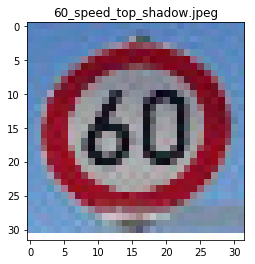

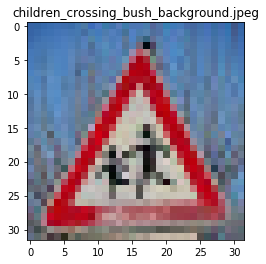

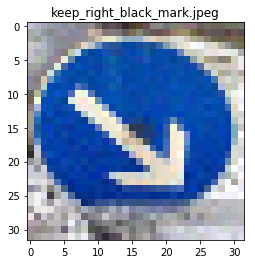

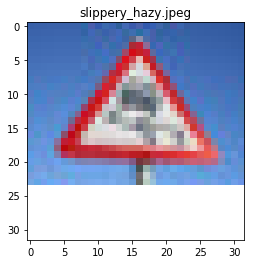

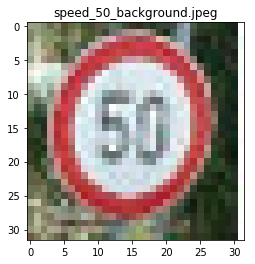

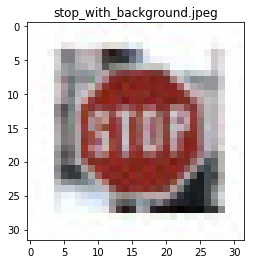

Number of web test images: (6, 32, 32, 3)


In [54]:
# 8 test images from the web (Google images)
import os
import matplotlib.image as mpimage

web_test_files = os.listdir('test_images')
X_web_test = []

for i in range(len(web_test_files)):
    img = mpimage.imread('test_images/'+web_test_files[i])
    plt.imshow(img)
    plt.title(web_test_files[i])
    assert(img.shape == (32,32,3))
    plt.show()
    X_web_test.append(img)

X_web_test = np.array(X_web_test)
print("Number of web test images:", X_web_test.shape)

### Predict the Sign Type for Each Image

In [55]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
predict_operation = tf.argmax(logits,1)
top5_operation = tf.nn.top_k(tf.nn.softmax(logits), k=5)

def estimate(X_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    prediction = sess.run(predict_operation, feed_dict={x: X_data })
    top5 = sess.run(top5_operation, feed_dict={x: X_data})
    return prediction, top5

INFO:tensorflow:Restoring parameters from ./lenet
Predicted Sign: Speed limit (60km/h)


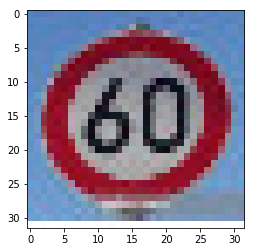

Predicted Sign: Children crossing


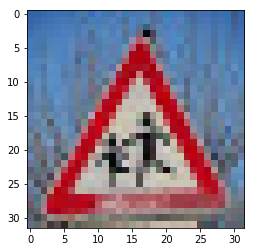

Predicted Sign: Keep right


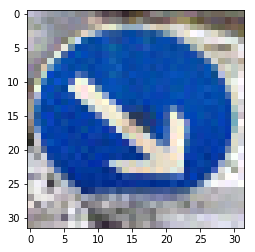

Predicted Sign: Roundabout mandatory


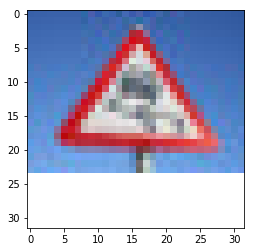

Predicted Sign: Speed limit (50km/h)


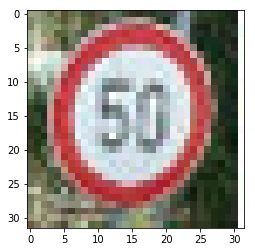

Predicted Sign: Stop


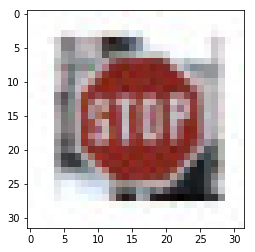

In [56]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    estimations, top5 = estimate(X_web_test)

    for i in range(len(estimations)):
        print ("Predicted Sign: " + signnames_dict[estimations[i]])
        plt.imshow(X_web_test[i])
        plt.show()

### Analyze Performance

In [60]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

n_total_web_images = 6
n_correct_classified = 5
print ("Model accuracy on web images = ", 100 * np.round(n_correct_classified/n_total_web_images, 2), "%")

Model accuracy on web images =  83.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [61]:
print (top5)

TopKV2(values=array([[5.2337372e-01, 4.7662631e-01, 8.7894969e-10, 3.3431999e-10,
        3.4995125e-12],
       [1.0000000e+00, 2.7149511e-18, 6.8867513e-23, 2.6293961e-24,
        2.1131971e-25],
       [9.9999821e-01, 1.8254152e-06, 8.8948514e-15, 1.6392007e-20,
        4.3422356e-23],
       [8.9485997e-01, 7.4513651e-02, 2.4951464e-02, 5.6638415e-03,
        7.4014588e-06],
       [9.9999905e-01, 8.5804703e-07, 4.6963070e-08, 3.3996889e-10,
        4.5129321e-12],
       [9.9999547e-01, 4.5232841e-06, 5.2306282e-10, 9.9666525e-12,
        7.1151461e-12]], dtype=float32), indices=array([[ 3,  5,  2, 29,  1],
       [28, 20,  0,  8, 30],
       [38,  1, 18,  0,  4],
       [ 3, 40, 11, 34, 17],
       [ 2,  5,  1,  7,  4],
       [14, 13,  5,  3,  2]], dtype=int32))


In [67]:
# First image - 60 and 80 km/h predictions are ~52% and 48% probable respectively 
print (signnames_dict[3])
print (signnames_dict[5])

Speed limit (60km/h)
Speed limit (80km/h)
